In [336]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [338]:
df = pd.read_csv('dataset/cheese_data.csv')

In [340]:
df.shape

(1042, 13)

In [342]:
df.columns

Index(['CheeseId', 'ManufacturerProvCode', 'ManufacturingTypeEn',
       'MoisturePercent', 'FlavourEn', 'CharacteristicsEn', 'Organic',
       'CategoryTypeEn', 'MilkTypeEn', 'MilkTreatmentTypeEn', 'RindTypeEn',
       'CheeseName', 'FatLevel'],
      dtype='object')

In [344]:
df.describe()

,CheeseId,MoisturePercent,Organic
count,1042.000000,1028.000000,1042.000000
mean,1560.633397,47.069747,0.095010
std,451.811164,9.592647,0.293369
min,228.000000,12.000000,0.000000
25%,1280.250000,40.000000,0.000000
50%,1548.500000,46.000000,0.000000
75%,1901.750000,52.000000,0.000000
max,2391.000000,92.000000,1.000000


In [346]:
df.dtypes

CheeseId                  int64
ManufacturerProvCode     object
ManufacturingTypeEn      object
MoisturePercent         float64
FlavourEn                object
CharacteristicsEn        object
Organic                   int64
CategoryTypeEn           object
MilkTypeEn               object
MilkTreatmentTypeEn      object
RindTypeEn               object
CheeseName               object
FatLevel                 object
dtype: object

In [348]:
df.isna().sum()

CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          14
FlavourEn               241
CharacteristicsEn       399
Organic                   0
CategoryTypeEn           23
MilkTypeEn                1
MilkTreatmentTypeEn      65
RindTypeEn              321
CheeseName                0
FatLevel                  0
dtype: int64

In [350]:
df = df.dropna(subset=['MilkTypeEn'])

In [352]:
df.isna().sum()

CheeseId                  0
ManufacturerProvCode      0
ManufacturingTypeEn       0
MoisturePercent          14
FlavourEn               241
CharacteristicsEn       399
Organic                   0
CategoryTypeEn           22
MilkTypeEn                0
MilkTreatmentTypeEn      64
RindTypeEn              320
CheeseName                0
FatLevel                  0
dtype: int64

In [354]:
df['MilkTypeEn'].value_counts()

MilkTypeEn
Cow                  743
Goat                 214
Ewe                   62
Cow and Goat          13
Ewe and Cow            4
Ewe and Goat           2
Buffalo Cow            2
Cow, Goat and Ewe      1
Name: count, dtype: int64

In [356]:
df['cow'] = (df['MilkTypeEn'] == "Cow") | (df['MilkTypeEn'] == "Cow and Goat") | (df['MilkTypeEn'] == "Ewe and Cow") | (df['MilkTypeEn'] == "Buffalo Cow") | (df['MilkTypeEn'] == "Cow, Goat and Ewe")
df['goat'] = (df['MilkTypeEn'] == "Goat") | (df['MilkTypeEn'] == "Cow and Goat") | (df['MilkTypeEn'] == "Ewe and Goat") | (df['MilkTypeEn'] == "Cow, Goat and Ewe")
df['ewe'] = (df['MilkTypeEn'] == "Ewe") | (df['MilkTypeEn'] == "Ewe and Cow") | (df['MilkTypeEn'] == "Ewe and Goat") | (df['MilkTypeEn'] == "Cow, Goat and Ewe")
df['buffalo'] = (df['MilkTypeEn'] == "Buffalo Cow")

In [358]:
dict_milk_cat ={"Cow": 1, "Goat": 2, "Ewe": 3, "Cow and Goat" : 5, "Ewe and Cow": 5, "Ewe and Goat": 5, "Buffalo Cow": 4, "Cow, Goat and Ewe": 5}
df['MilkTypeCat'] = df['MilkTypeEn'].map(dict_milk_cat)
#df['MilkTypeCat'] = df['MilkTypeCat'].astype(int)

In [360]:
df['MilkTypeCat'].value_counts()

MilkTypeCat
1    743
2    214
3     62
5     20
4      2
Name: count, dtype: int64

(array([  1.,   1.,   5.,  10.,  10.,  44., 136., 216., 131., 204., 123.,
         48.,  37.,  18.,  20.,   9.,   5.,   6.,   1.,   2.]),
 array([12., 16., 20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.,
        64., 68., 72., 76., 80., 84., 88., 92.]),
 <BarContainer object of 20 artists>)

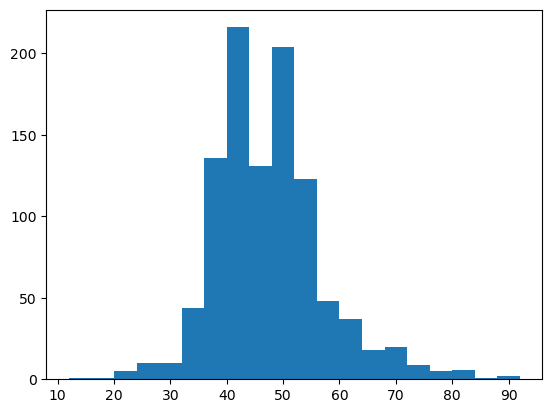

In [362]:
plt.hist(df['MoisturePercent'], bins=20)

C:\Users\OmenH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OmenH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OmenH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\OmenH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

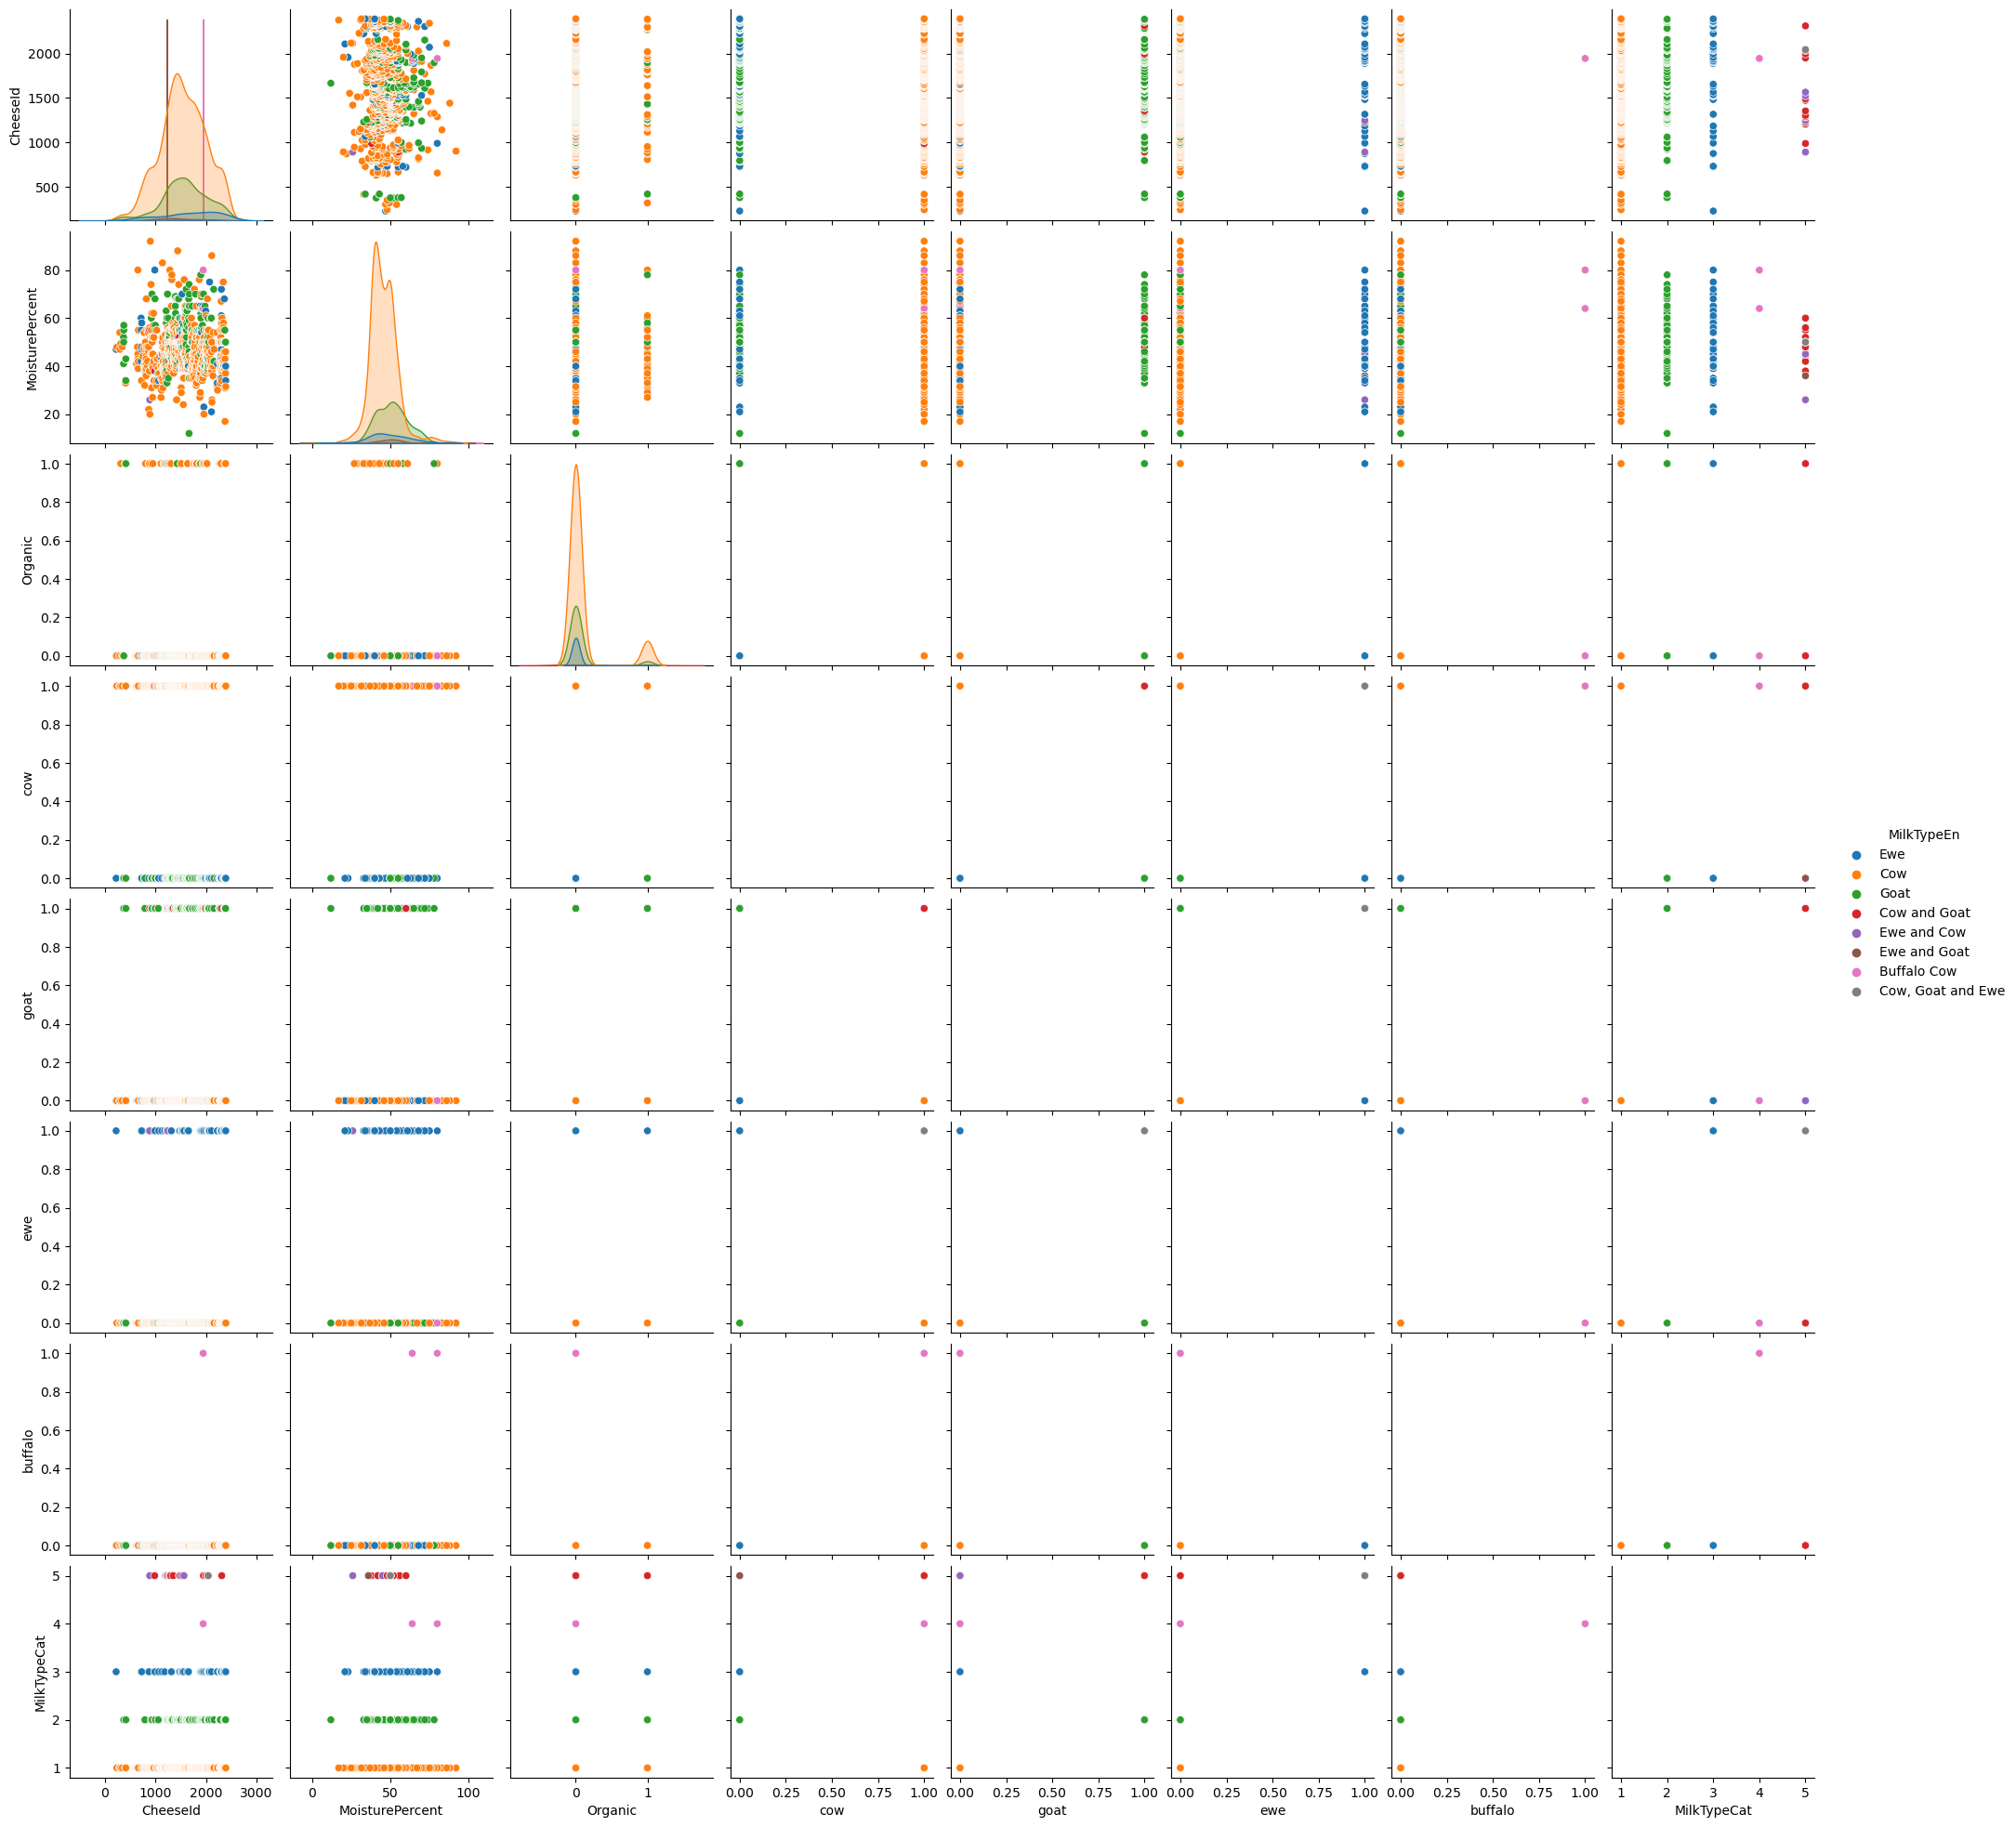

In [380]:
sns.pairplot(df, hue='MilkTypeEn')

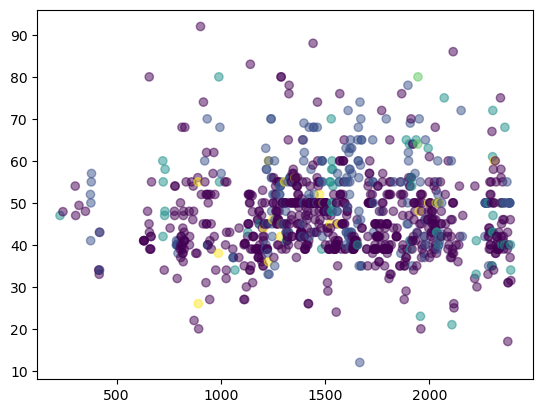

In [364]:
plt.scatter(df['CheeseId'], df['MoisturePercent'], c=df['MilkTypeCat'], alpha=0.5)

In [314]:
df['CategoryTypeEn'] = df['CategoryTypeEn'].astype('category')

In [318]:
df.dtypes

CheeseId                   int64
ManufacturerProvCode      object
ManufacturingTypeEn       object
MoisturePercent          float64
FlavourEn                 object
CharacteristicsEn         object
Organic                    int64
CategoryTypeEn          category
MilkTypeEn                object
MilkTreatmentTypeEn       object
RindTypeEn                object
CheeseName                object
FatLevel                  object
cow                         bool
goat                        bool
ewe                         bool
buffalo                     bool
MilkTypeCat                int64
dtype: object

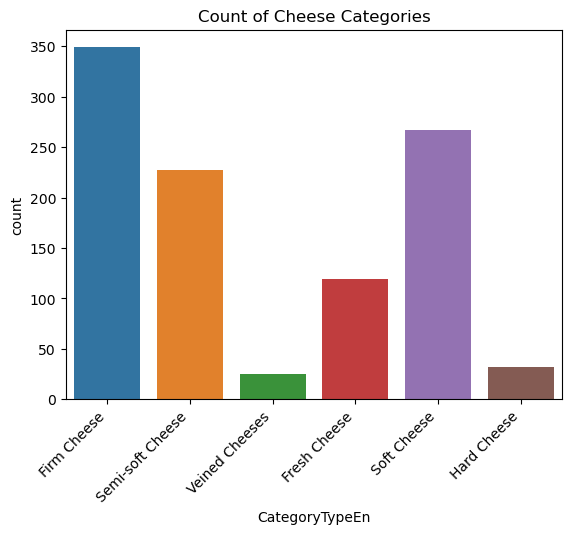

In [366]:
# Plot the counts of each category in CategoryTypeEn
sns.countplot(data=df, x='CategoryTypeEn')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Count of Cheese Categories')
plt.show()

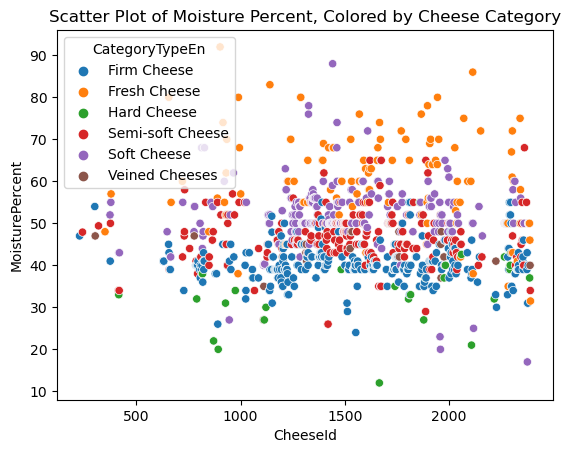

In [326]:
# Create a scatter plot with MoisturePercent on the x-axis and FatLevel on the y-axis, colored by CategoryTypeEn
sns.scatterplot(data=df, x='CheeseId', y='MoisturePercent', hue='CategoryTypeEn')

plt.title('Scatter Plot of Moisture Percent, Colored by Cheese Category')
plt.show()

In [370]:
df['ManufacturingTypeEn'] = df['ManufacturingTypeEn'].astype('category')

C:\Users\OmenH\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


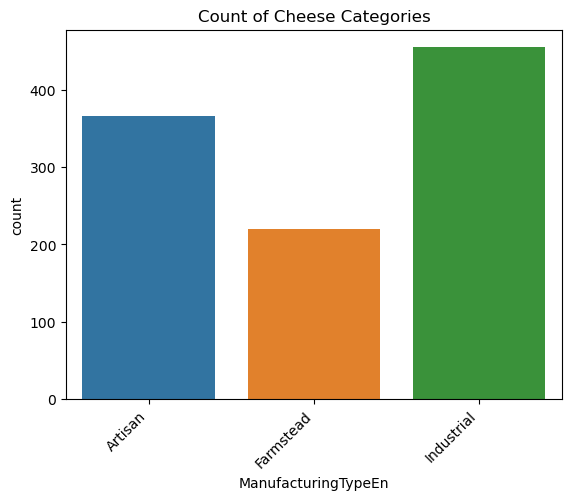

In [372]:
sns.countplot(data=df, x='ManufacturingTypeEn')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Count of Cheese Categories')
plt.show()

In [374]:
df.dtypes

CheeseId                   int64
ManufacturerProvCode      object
ManufacturingTypeEn     category
MoisturePercent          float64
FlavourEn                 object
CharacteristicsEn         object
Organic                    int64
CategoryTypeEn            object
MilkTypeEn                object
MilkTreatmentTypeEn       object
RindTypeEn                object
CheeseName                object
FatLevel                  object
cow                         bool
goat                        bool
ewe                         bool
buffalo                     bool
MilkTypeCat                int64
dtype: object